In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
train = data('iris')

In [3]:
# train,columns = [
#     col.lower().replace(',', '_')
    

In [4]:
train.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

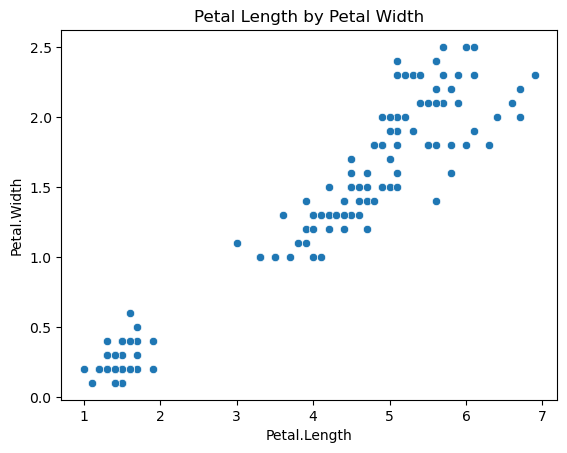

In [5]:
sns.scatterplot(data=train, x='Petal.Length', y='Petal.Width')
plt.title('Petal Length by Petal Width')
plt.show()

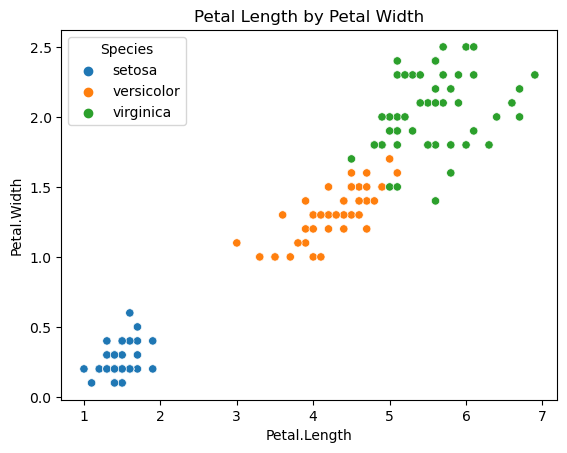

In [6]:
sns.scatterplot(data=train, x='Petal.Length', y='Petal.Width', hue='Species')
plt.title('Petal Length by Petal Width')
plt.show()

In [7]:
# create a function that gives us distances

In [8]:
def get_distances(list_a, list_b):
    # initialize an empty list to toss the differences into
    difs = []
    # for every comparison ifd ims in the points
    for a_i, b_i in zip(list_a, list_b):
        difs.append((a_i - b_i) ** 2)
    return sum(difs) ** .5

In [9]:
pnt_a = [0, 1, 3]
pnt_b = [6, 10, 30]
get_distances(pnt_a, pnt_b)

29.086079144497972

In [10]:
# distance formula works. -- let's create some centroids:
centroid = {
    0: [0, 0],
    1: [0.5, 0.5],
    2: [0.8, 0.8]
}

In [11]:
# find a way to assign clusters -- before we proceed lets scale those features.

In [12]:
scaler = MinMaxScaler()
train[['Petal.Length', 'Petal.Width']] = \
scaler.fit_transform(train[['Petal.Length', 'Petal.Width']])

In [13]:
feats = ['Petal.Length', 'Petal.Width']

In [14]:
train[feats]

,Petal.Length,Petal.Width
1,0.067797,0.041667
2,0.067797,0.041667
3,0.050847,0.041667
4,0.084746,0.041667
5,0.067797,0.041667
6,0.118644,0.125000
7,0.067797,0.083333
8,0.084746,0.041667
9,0.067797,0.041667
10,0.084746,0.000000


In [15]:
centroid.keys()

dict_keys([0, 1, 2])

In [16]:
centroid[0]

[0, 0]

In [17]:
pd.Series([0, 10, 11])

0     0
1    10
2    11
dtype: int64

In [22]:
def assign_clusters():
    # initialize a okace ti tiss ckuster assignments
    cluster_assignments = []
    for i, row in train[feats].iterrows():
        # print('=====')
        # toss our centroid distances somewhere:
        distances = []
        for n in centroid.keys():
            # use our distance functions to cakc the
            # distance between each data point abd the centroids.
            distances.append(get_distances(centroid[n], row.values))
            # use the distance list
            # cast it as a series , use indec of the min to link
            # back to the dictionary keys
        clusters = pd.Series(distances).idxmin()
        cluster_assignments.append(clusters)
        # print('--------')
    return cluster_assignments

In [23]:
assign_clusters()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [24]:
train['cluster'] = assign_clusters()

In [26]:
# [train[feats] [train['cluster'] == 0]

In [ ]:
feats

In [31]:
train[['Petal.Length', 'Petal.Width', 'cluster']].groupby('cluster').mean().values[0]

array([0.07830508, 0.06083333])

In [32]:
#update the centroids:
#iterate through th groups:
for i in train.cluster.unique():
    centroid[i] = train[
        ['Petal.Length', 'Petal.Width', 'cluster']
    ].groupby('cluster').mean().values[i]

In [33]:
centroid

{0: array([0.07830508, 0.06083333]),
 1: array([0.55152542, 0.5075    ]),
 2: array([0.77254237, 0.80583333])}

In [36]:
feats_with_cluster = ['Petal.Length', 'Petal.Width', 'cluster']

<function matplotlib.pyplot.show(close=None, block=None)>

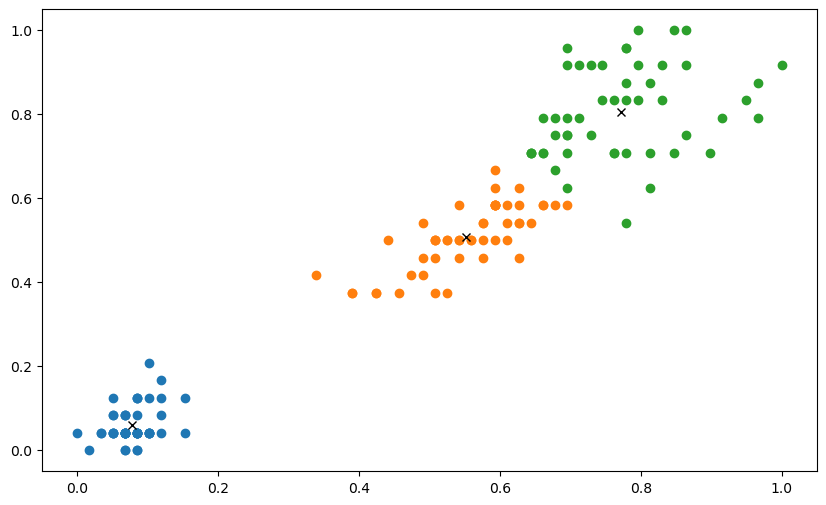

In [53]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
for cluster, subset in train[feats_with_cluster].groupby('cluster'):
    ax.scatter(subset['Petal.Length'], subset['Petal.Width'], label=cluster)
for i in centroid.keys():
    # unpack the dimensions associated iwht the data point in the dictionary
    ax.plot(*centroid[i], marker='x', c='black')
plt.show

In [ ]:
#groupbys at least to our immediate knowledge need to 

In [57]:
for i, subset in train.groupby('Species'):
    print(i)
    print('======')
    print(subset.to_markdown())
    print('=====')

setosa
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |   cluster |
|---:|---------------:|--------------:|---------------:|--------------:|:----------|----------:|
|  1 |            5.1 |           3.5 |      0.0677966 |     0.0416667 | setosa    |         0 |
|  2 |            4.9 |           3   |      0.0677966 |     0.0416667 | setosa    |         0 |
|  3 |            4.7 |           3.2 |      0.0508475 |     0.0416667 | setosa    |         0 |
|  4 |            4.6 |           3.1 |      0.0847458 |     0.0416667 | setosa    |         0 |
|  5 |            5   |           3.6 |      0.0677966 |     0.0416667 | setosa    |         0 |
|  6 |            5.4 |           3.9 |      0.118644  |     0.125     | setosa    |         0 |
|  7 |            4.6 |           3.4 |      0.0677966 |     0.0833333 | setosa    |         0 |
|  8 |            5   |           3.4 |      0.0847458 |     0.0416667 | setosa    |         0 |
|  9 |            4.4 |

In [59]:
# lets do those again indefinitely for fun :)

In [ ]:
'''
when we are living in a loop for this transformation:
assign the clusters
update the centroids
plot
rinse, repeat
'''

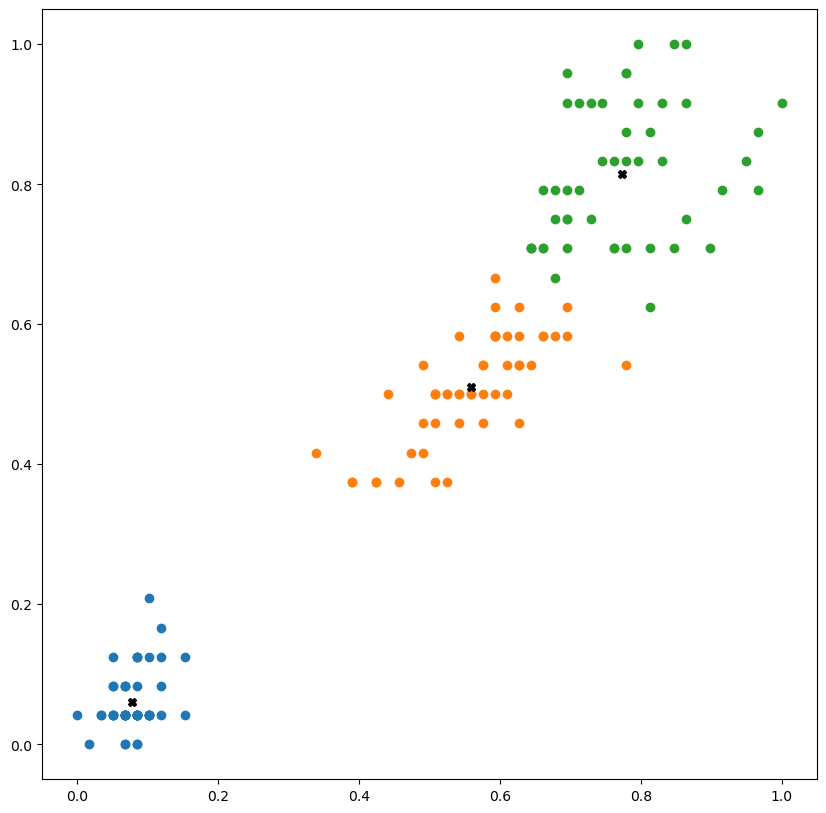

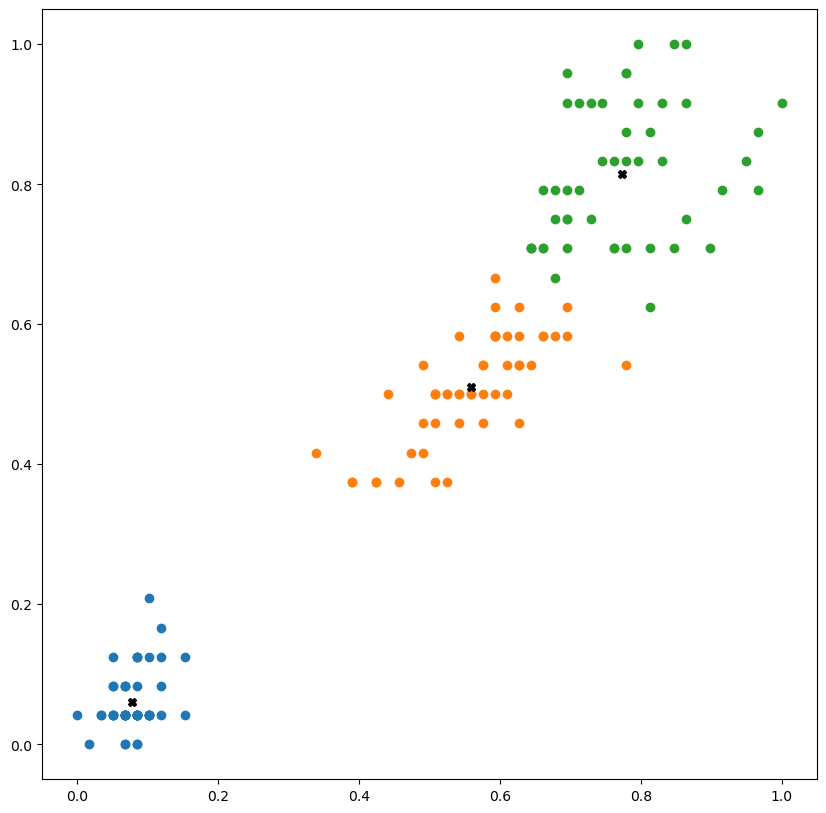

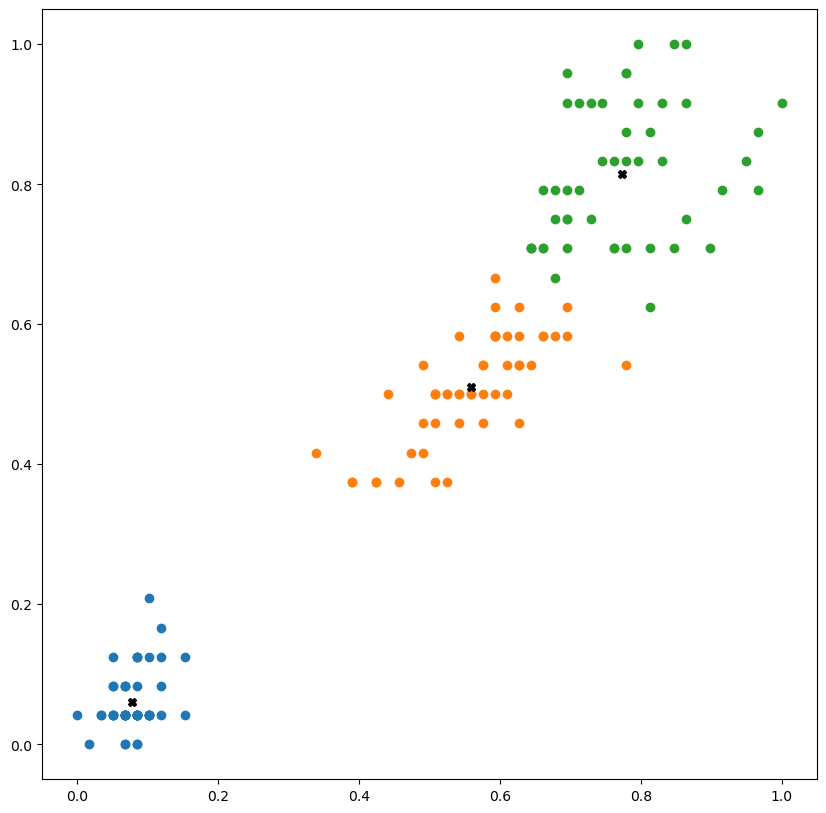

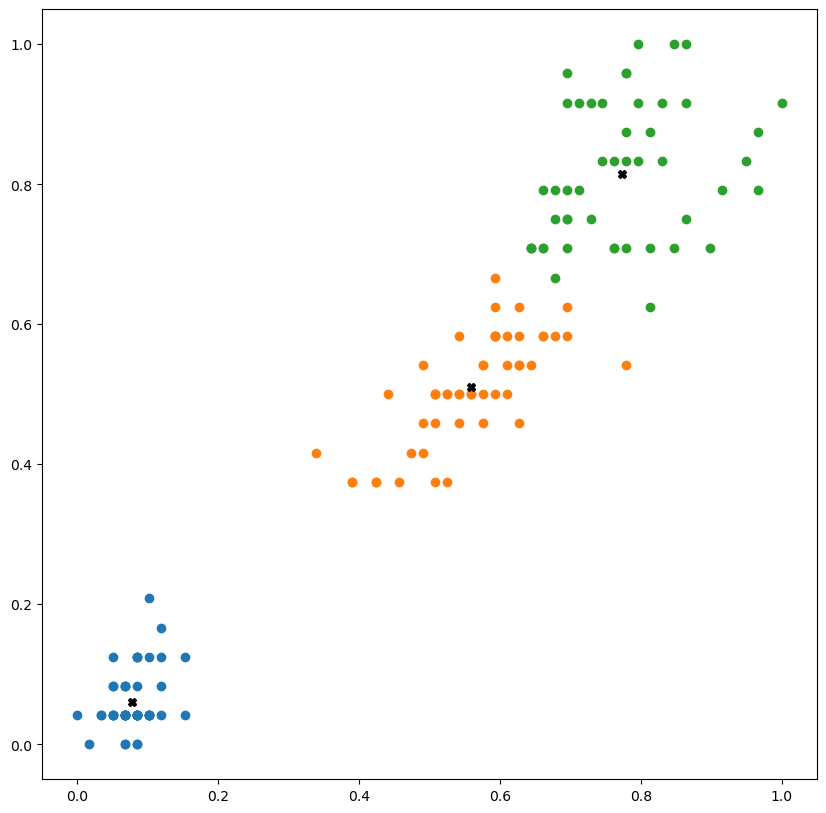

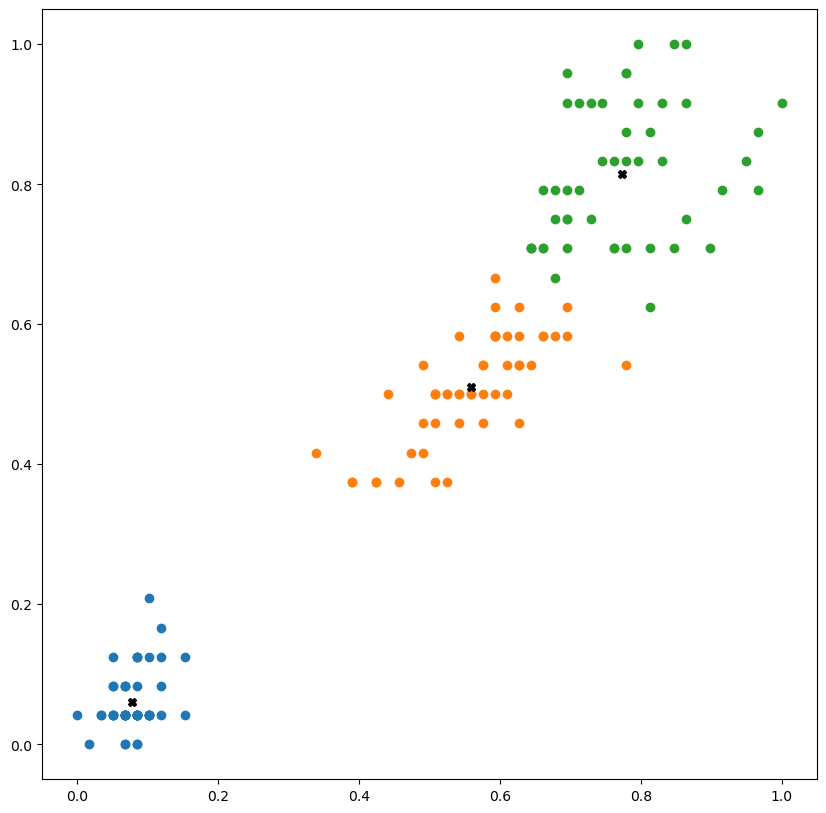

In [82]:
#k-means algorithm from scratch visual iteration
for i in range(5):
    # assign the clusters
    train['cluster'] = assign_clusters()
    # update the centroids
    for i in train.cluster.unique():
        centroid[i] = train[
            ['Petal.Length', 'Petal.Width', 'cluster']
        ].groupby('cluster').mean().values[i]
    # plot the stuff:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    for cluster, subset in train[feats_with_cluster].groupby(
        'cluster'):
        ax.scatter(subset['Petal.Length'], subset['Petal.Width'], label=cluster)
    for i in centroid.keys():
        # unpack the dimensions associated with the data point in the dictionary
        ax.plot(*centroid[i], marker='X', c='black')
    plt.show()

In [63]:
kmeans = KMeans(n_clusters=3)

In [65]:
# fit the thing
kmeans.fit(train[feats])

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [71]:
# use the thing:
train['sk_clusters'] = kmeans.predict(train[feats])

In [72]:
kmeans.inertia_

1.7018746881920968

In [79]:
{k: v for k,v in zip(['ham', 'sandwich'], [20,40])}

{'ham': 20, 'sandwich': 40}

<Axes: >

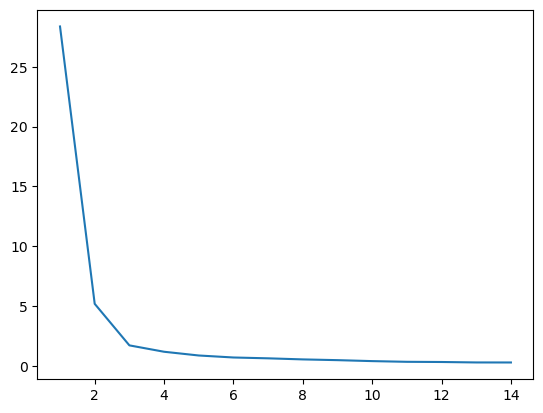

In [80]:
pd.Series(
    {i:
     KMeans(n_clusters=i, n_init='auto').fit(train[feats]).inertia_
            for i in range(1,15)
}).plot()